In [119]:
# Tabular Playground Series - Jun 2021
# Link Below
# https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

# Lundquist Griffin griffin.lundquist@studio.unibo.it,
# McCallan Oliver, oliver.mccallan@studio.unibo.it
# Mendoza Alberto, alberto.mendozaperea@studio.unibo.it
# Simon Christopher, ronald.simon@studio.unibo.it
# Lanccetti Valerico, valerico.laccetti@studio.unibo.it


import warnings

# warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

plt.style.use("seaborn-v0_8")

In [120]:
# from google.colab import drive

# drive.mount("/content/drive")

In [121]:
google_drive_path = ""

In [122]:
random_state = 42
np.random.seed(
    random_state
)  # this sets the random sequence. Setting only this the repeatability is guaranteed
# only if we re-execute the entire notebook

In [123]:
# show 10 random records
df = pd.read_csv("train.csv")
df.sample(n=10, random_state=random_state)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [124]:
# number of unique values
for col in df.columns:
    print(df[col].name, "\t", df[col].value_counts().count())

id 	 200000
feature_0 	 42
feature_1 	 37
feature_2 	 48
feature_3 	 59
feature_4 	 30
feature_5 	 55
feature_6 	 40
feature_7 	 26
feature_8 	 28
feature_9 	 51
feature_10 	 32
feature_11 	 37
feature_12 	 28
feature_13 	 40
feature_14 	 30
feature_15 	 105
feature_16 	 27
feature_17 	 15
feature_18 	 21
feature_19 	 66
feature_20 	 28
feature_21 	 31
feature_22 	 55
feature_23 	 21
feature_24 	 50
feature_25 	 40
feature_26 	 20
feature_27 	 49
feature_28 	 78
feature_29 	 58
feature_30 	 18
feature_31 	 36
feature_32 	 77
feature_33 	 41
feature_34 	 31
feature_35 	 39
feature_36 	 28
feature_37 	 26
feature_38 	 39
feature_39 	 47
feature_40 	 35
feature_41 	 56
feature_42 	 42
feature_43 	 53
feature_44 	 26
feature_45 	 27
feature_46 	 87
feature_47 	 63
feature_48 	 39
feature_49 	 23
feature_50 	 40
feature_51 	 49
feature_52 	 25
feature_53 	 34
feature_54 	 72
feature_55 	 65
feature_56 	 35
feature_57 	 28
feature_58 	 31
feature_59 	 92
feature_60 	 99
feature_61 	 70
featu

In [125]:
df["target"].unique()

array(['Class_6', 'Class_2', 'Class_8', 'Class_3', 'Class_1', 'Class_5',
       'Class_7', 'Class_9', 'Class_4'], dtype=object)

In [126]:
# create X_full
X_full = df.drop("id", axis=1).iloc[:, :-1]
encoder = LabelEncoder()
y = encoder.fit_transform(df["target"])

In [127]:
# show X_full
X_full.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
model_lbls = [
    "dt"  # decision tree
    # ,'nb' # gaussian naive bayes
    ,
    "rf"  # random forest
    # ,'lp'   # linear perceptron
    # ,'svc'  # support vector
    # ,'knn'  # k nearest neighbours
    # ,'adb'  # adaboost
]

models = {
    "dt": {
        "name": "Decision Tree       ",
        "estimator": DecisionTreeClassifier(random_state=random_state),
        "param": [{"max_depth": [*range(1, 20)], "class_weight": [None, "balanced"]}],
    },
    "nb": {
        "name": "Gaussian Naive Bayes",
        "estimator": GaussianNB(),
        "param": [{"var_smoothing": [10**exp for exp in range(-3, -12, -1)]}],
    },
    "lp": {
        "name": "Linear Perceptron   ",
        "estimator": Perceptron(random_state=random_state),
        "param": [
            {"early_stopping": [True, False], "class_weight": [None, "balanced"]}
        ],
    },
    "svc": {
        "name": "Support Vector      ",
        "estimator": SVC(random_state=random_state),
        "param": [
            {
                "kernel": ["rbf"],
                "gamma": [1e-3, 1e-4],
                "C": [1, 10, 100],
            },
            {
                "kernel": ["linear"],
                "C": [1, 10, 100],
            },
        ],
    },
    "knn": {
        "name": "K Nearest Neighbor ",
        "estimator": KNeighborsClassifier(),
        "param": [{"n_neighbors": list(range(1, 7))}],
    },
    "adb": {
        "name": "AdaBoost           ",
        "estimator": AdaBoostClassifier(random_state=random_state),
        "param": [
            {
                "n_estimators": [20, 30, 40, 50],
                "learning_rate": [0.5, 0.75, 1, 1.25, 1.5],
            }
        ],
    },
    "rf": {
        "name": "Random forest       ",
        "estimator": RandomForestClassifier(random_state=random_state),
        "param": [
            {
                # 'max_depth': [*range(4,30)]
                "max_depth": [*range(4, 30, 4)]
                #  ,'n_estimators':[*range(20,80,5)]
                ,
                "n_estimators": [*range(10, 30, 5)],
                "class_weight": [None, "balanced"],
            }
        ],
    },
}

[0.11669831 0.07591789 0.05308423 0.04570598 0.03864043 0.03184003
 0.03012308 0.02934325 0.02765308 0.02628103 0.02476721 0.02408011
 0.02304794 0.02192776 0.02063361 0.01896836 0.01795094 0.0171754
 0.01612948 0.01516765 0.01461421 0.01389225 0.01325595 0.0127744
 0.01232842 0.01184508 0.01162701 0.0112386  0.01072903 0.01029036
 0.00927199 0.00903617 0.00854496 0.00809131 0.00792701 0.00746077
 0.00720115 0.00693542 0.00688668 0.00686254 0.0067852  0.00669558
 0.00657856 0.00651044 0.00635624 0.00599466 0.00556866 0.00544044
 0.00524656 0.00504432 0.00483356 0.00411028 0.00381469 0.00372358
 0.00369381 0.00351625 0.00343449 0.00327978 0.00318041 0.00311074
 0.00272257 0.00270213 0.00238233 0.00218239 0.00211184 0.00206021
 0.00195977 0.0019241  0.00183644 0.00167358 0.00156027 0.00137893
 0.00124575 0.00088061 0.00051175]


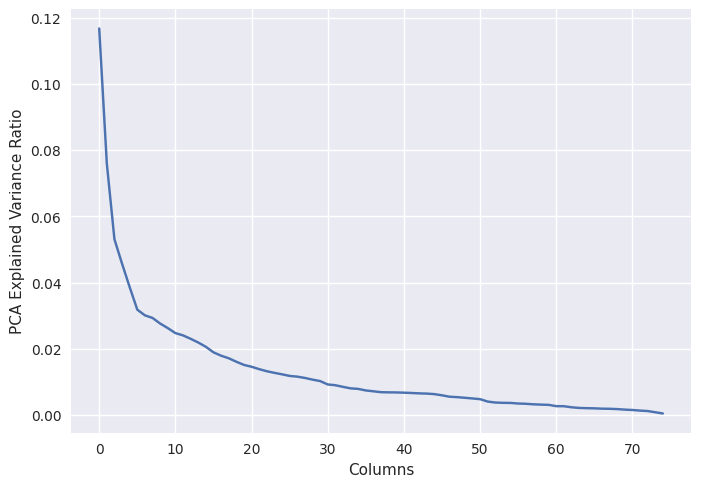

In [129]:
pca = PCA(random_state=random_state).fit(X_full)
X_full_t = pca.transform(X_full)
print(pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Columns")
plt.ylabel("PCA Explained Variance Ratio")
plt.show()

In [130]:
# Sort the explained variance ratios in descending order
ratios = np.flip(np.sort(pca.explained_variance_ratio_))

# Calculate the cumulative sum of the explained variance ratios
cum_sum = np.cumsum(ratios)

# Find the index i of the first principal component where the cumulative sum exceeds 0.20
i = np.argmax(cum_sum > 0.8)
print(i)

# Keep the first i principal components and discard the rest
X = X_full_t[:, :30]

30


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=random_state, train_size=0.01
)

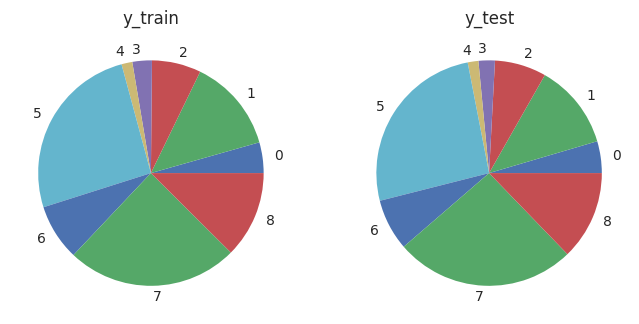

In [132]:
plt.subplot(121)
plt.pie(
    np.unique(y_train, return_counts=True)[1],
    labels=np.unique(y_train, return_counts=True)[0],
)
plt.title("y_train")

plt.subplot(122)
plt.pie(
    np.unique(y_test, return_counts=True)[1],
    labels=np.unique(y_test, return_counts=True)[0],
)
plt.title("y_test")
plt.show()

In [133]:
scorings = [
    "accuracy"
    # ,'precision_macro'
    # ,'recall_macro'
    ,
    "f1_macro",
]

In [134]:
# Count numbers of trials
from sklearn.model_selection import ParameterGrid

trials = {lbl: len(list(ParameterGrid(models[lbl]["param"]))) for lbl in model_lbls}
trials

{'dt': 38, 'rf': 56}

In [135]:
clfs = []
results = pd.DataFrame(
    columns=[
        "scoring",
        "model",
        "best_params",
        "accuracy",
        "precision_macro",
        "recall_macro",
        "f1_macro",
    ]
)

In [136]:
# grid search cv
for scoring in scorings:
    print("\n\n ###################################### SCORE:", scoring)
    for model in model_lbls:
        print("---------------------------")
        print("# Tuning hyper-parameters for", scoring, "and model", model)
        clf = GridSearchCV(
            models[model]["estimator"],
            param_grid=models[model]["param"],
            scoring=scoring,
            cv=5,
        )
        clfs.append(clf)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cr = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

        results.loc[len(results)] = {
            "scoring": scoring,
            "model": models[model]["name"],
            "best_params": clf.best_params_,
            "accuracy": cr["accuracy"],
            "precision_macro": cr["macro avg"]["precision"],
            "recall_macro": cr["macro avg"]["recall"],
            "f1_macro": cr["macro avg"]["f1-score"],
        }



 ###################################### SCORE: accuracy
---------------------------
# Tuning hyper-parameters for accuracy and model dt
---------------------------
# Tuning hyper-parameters for accuracy and model rf


 ###################################### SCORE: f1_macro
---------------------------
# Tuning hyper-parameters for f1_macro and model dt
---------------------------
# Tuning hyper-parameters for f1_macro and model rf


In [137]:
best_indexes = {}
for score in scorings:
    res = (
        results[results.scoring == score]
        .sort_values(by=score, ascending=False)
        .drop("scoring", axis=1)
    )
    display(
        res.style.format(precision=3).set_caption(
            'Results for scoring "{}"'.format(score)
        )
    )
    best_indexes[score] = res[:1].index[0]

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random forest,"{'class_weight': None, 'max_depth': 4, 'n_estimators': 20}",0.328,0.680,0.163,0.130
0,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.307,0.682,0.148,0.126


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 25}",0.258,0.154,0.161,0.155
2,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.277,0.149,0.145,0.133


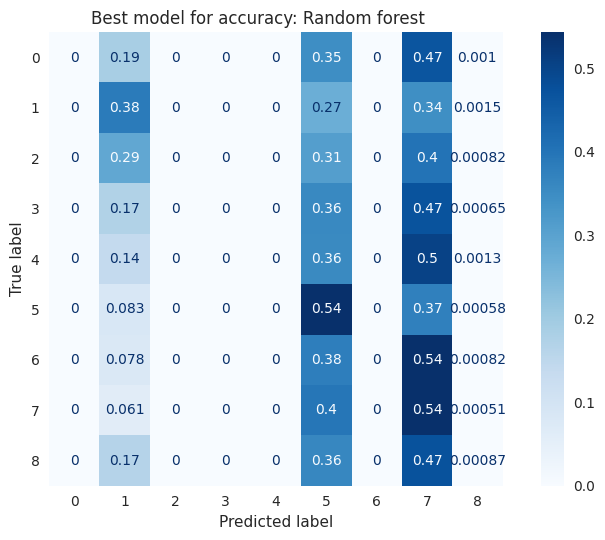

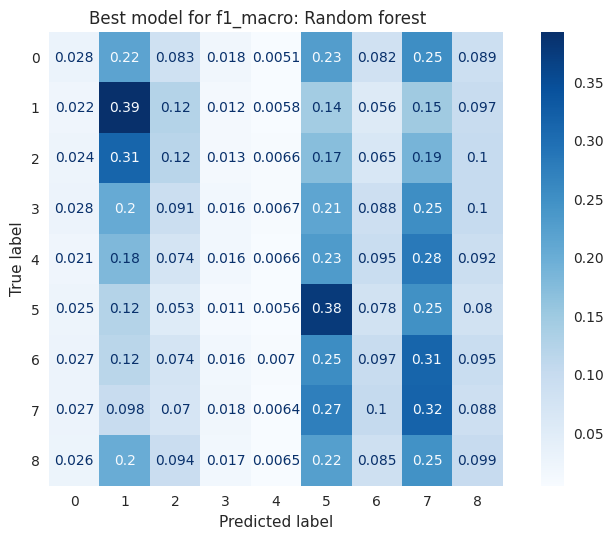

In [147]:
for score in scorings:
    ConfusionMatrixDisplay.from_estimator(
        clfs[best_indexes[score]], X_test, y_test, cmap=plt.cm.Blues, normalize="true"
    )
    plt.title(
        "Best model for {}: {}".format(score, results.loc[best_indexes[score]]["model"])
    )
    plt.grid(None)
    plt.tight_layout()
    plt.show()

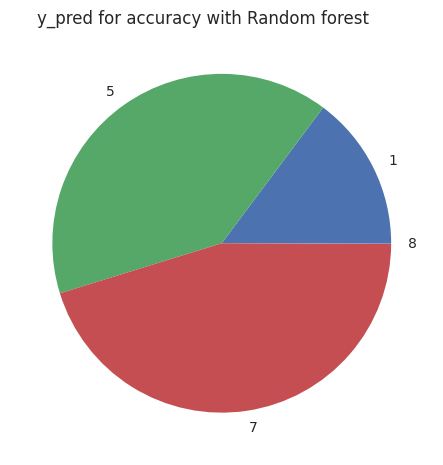

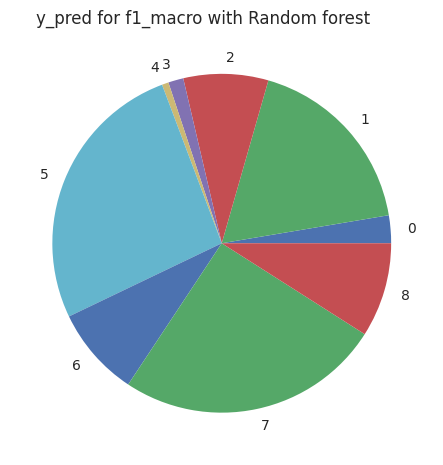

In [154]:
# final test with best model trained on all (train) data
df_test = pd.read_csv("test.csv").drop("id", axis=1)

df_test_t = pca.transform(df_test)[:, :30]


for score in scorings:
    y_pred = clfs[best_indexes[score]].predict(df_test_t)
    plt.pie(
        np.unique(y_pred, return_counts=True)[1],
        labels=np.unique(y_pred, return_counts=True)[0],
    )
    plt.title(
        "y_pred for {} with {}".format(score, results.loc[best_indexes[score]]["model"])
    )
    plt.show()